In [1]:
import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import xarray as xr
import smoothlib


1.6.1


/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
tsl_filelist = [
['tsl_Lmon_CESM2-FV2_historical_r1i1p1f1_gn_185001-189912.nc',
'tsl_Lmon_CESM2-FV2_historical_r1i1p1f1_gn_190001-194912.nc',
'tsl_Lmon_CESM2-FV2_historical_r1i1p1f1_gn_195001-199912.nc',
'tsl_Lmon_CESM2-FV2_historical_r1i1p1f1_gn_200001-201412.nc'],
['tsl_Lmon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_185001-189912.nc',
'tsl_Lmon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_190001-194912.nc',
'tsl_Lmon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_195001-199912.nc',
'tsl_Lmon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_200001-201412.nc'],
['tsl_Lmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'],
['tsl_Lmon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc'],
['tsl_Lmon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'],
['tsl_Lmon_E3SM-1-0_historical_r1i1p1f1_gr_185001-187412.nc',
'tsl_Lmon_E3SM-1-0_historical_r1i1p1f1_gr_187501-189912.nc',
'tsl_Lmon_E3SM-1-0_historical_r1i1p1f1_gr_190001-192412.nc',
'tsl_Lmon_E3SM-1-0_historical_r1i1p1f1_gr_192501-194912.nc',
'tsl_Lmon_E3SM-1-0_historical_r1i1p1f1_gr_195001-197412.nc',
'tsl_Lmon_E3SM-1-0_historical_r1i1p1f1_gr_197501-199912.nc',
'tsl_Lmon_E3SM-1-0_historical_r1i1p1f1_gr_200001-201412.nc'],
['tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185001-185012.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185101-185112.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185201-185212.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185301-185312.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185401-185412.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185501-185512.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185601-185612.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185701-185712.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185801-185812.nc',
'tsl_Lmon_EC-Earth3_historical_r1i1p1f1_gr_185901-185912.nc'],
['tsl_Lmon_GFDL-CM4_historical_r1i1p1f1_gr1_185001-194912.nc',
'tsl_Lmon_GFDL-CM4_historical_r1i1p1f1_gr1_195001-201412.nc'],
['tsl_Lmon_GISS-E2-1-G-CC_historical_r1i1p1f1_gn_185001-190012.nc',
'tsl_Lmon_GISS-E2-1-G-CC_historical_r1i1p1f1_gn_190101-195012.nc',
'tsl_Lmon_GISS-E2-1-G-CC_historical_r1i1p1f1_gn_195101-200012.nc',
'tsl_Lmon_GISS-E2-1-G-CC_historical_r1i1p1f1_gn_200101-201412.nc'],
['tsl_Lmon_GISS-E2-1-G_historical_r1i1p1f1_gn_185001-190012.nc',
'tsl_Lmon_GISS-E2-1-G_historical_r1i1p1f1_gn_190101-195012.nc',
'tsl_Lmon_GISS-E2-1-G_historical_r1i1p1f1_gn_195101-200012.nc',
'tsl_Lmon_GISS-E2-1-G_historical_r1i1p1f1_gn_200101-201412.nc'],
['tsl_Lmon_GISS-E2-1-H_historical_r1i1p1f1_gn_185001-190012.nc',
 'tsl_Lmon_GISS-E2-1-H_historical_r1i1p1f1_gn_190101-195012.nc',
'tsl_Lmon_GISS-E2-1-H_historical_r1i1p1f1_gn_195101-200012.nc',
'tsl_Lmon_GISS-E2-1-H_historical_r1i1p1f1_gn_200101-201412.nc'],
['tsl_Lmon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'],
['tsl_Lmon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc',
'tsl_Lmon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc'],
['tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001-185412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185501-185912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_186001-186412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_186501-186912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_187001-187412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_187501-187912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_188001-188412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_188501-188912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_189001-189412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_189501-189912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_190001-190412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_190501-190912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_191001-191412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_191501-191912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_192001-192412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_192501-192912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_193001-193412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_193501-193912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_194001-194412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_194501-194912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_195001-195412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_195501-195912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_196001-196412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_196501-196912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_197001-197412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_197501-197912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_198001-198412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_198501-198912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199001-199412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc',
'tsl_Lmon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc'],
['tsl_Lmon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-189912.nc',
'tsl_Lmon_MRI-ESM2-0_historical_r1i1p1f1_gn_190001-194912.nc',
'tsl_Lmon_MRI-ESM2-0_historical_r1i1p1f1_gn_195001-199912.nc',
'tsl_Lmon_MRI-ESM2-0_historical_r1i1p1f1_gn_200001-201412.nc'],
['tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_185001-185912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_186001-186912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_187001-187912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_188001-188912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_190001-190912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_191001-191912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_192001-192912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_193001-193912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_194001-194912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_195001-195912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_196001-196912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_197001-197912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_198001-198912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_199001-199912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc',
'tsl_Lmon_NorESM2-LM_historical_r1i1p1f1_gn_201001-201412.nc'],
['tsl_Lmon_FGOALS-f3-L_historical_r1i1p1f1_gn_185001-201412.nc'],
]

datadir = '~/Downloads/'

In [3]:
nmodels = len(tsl_filelist)
model_names = []
for i in range(nmodels):
    model_names.append(tsl_filelist[i][0].split('_')[2])
print(model_names)

tfrz = 273.15

['CESM2-FV2', 'CESM2-WACCM-FV2', 'CESM2-WACCM', 'CESM2', 'CanESM5', 'E3SM-1-0', 'EC-Earth3', 'GFDL-CM4', 'GISS-E2-1-G-CC', 'GISS-E2-1-G', 'GISS-E2-1-H', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-LM', 'FGOALS-f3-L']


/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/xarray/conventions.py:394: SerializationWarning: variable u'tsl' has multiple fill values set([1e+20, 1e+20]), decoding all values to NaN.
  stack_char_dim=stack_char_dim)


('CESM2-FV2', (165, 96, 144))


/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*args2)
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)


(96, 144)
 


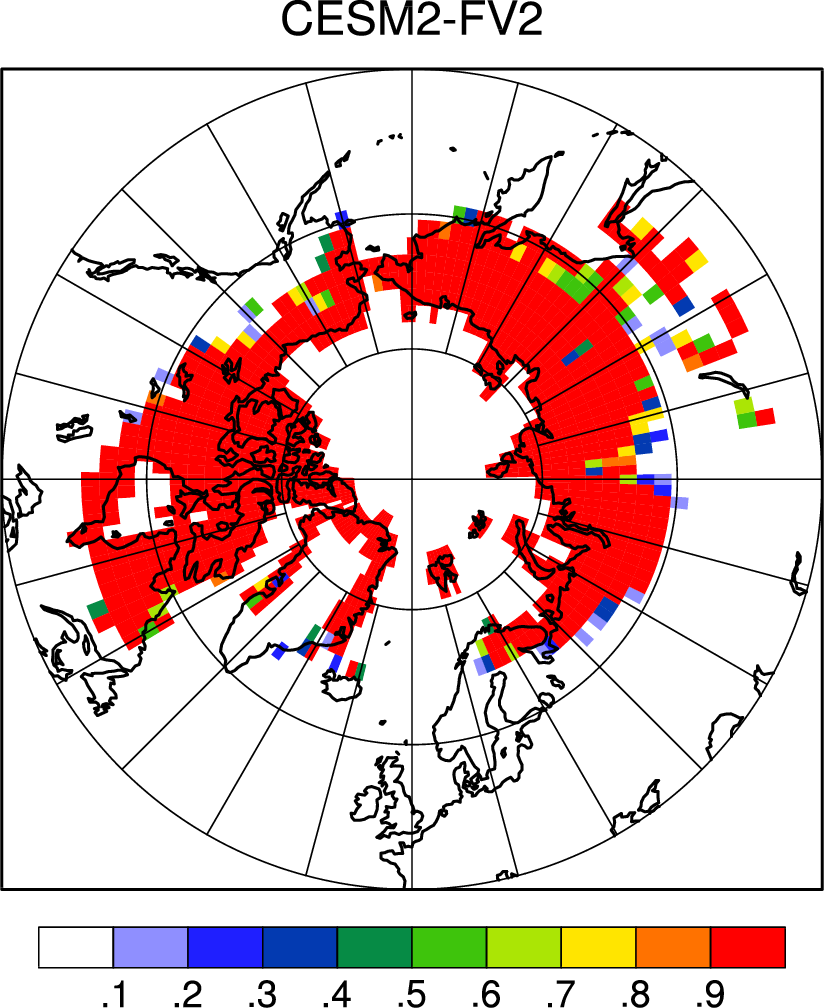

('CESM2-WACCM-FV2', (165, 96, 144))
(96, 144)
 


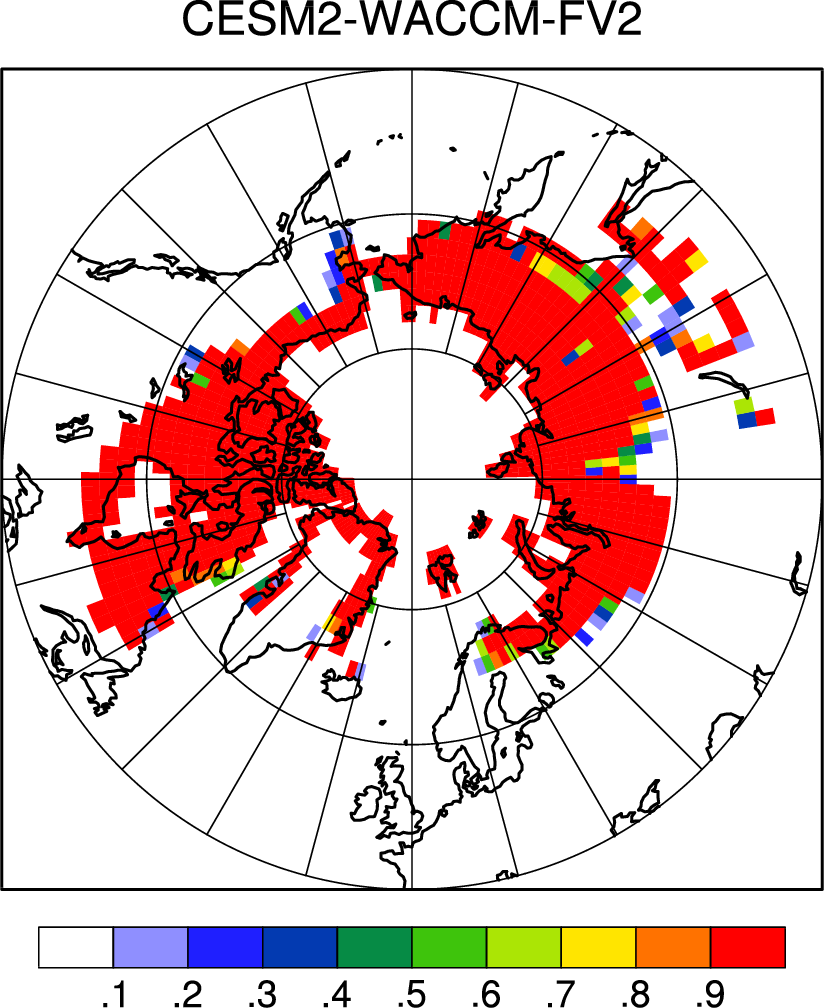

('CESM2-WACCM', (165, 192, 288))
(192, 288)
 


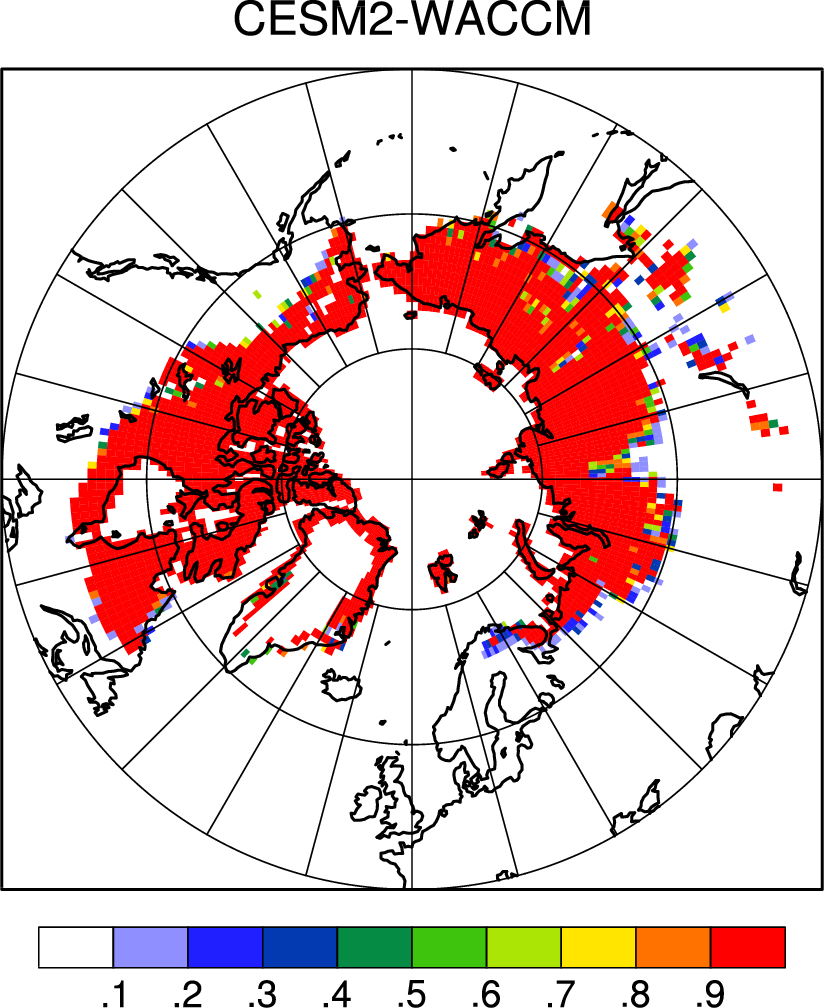

('CESM2', (165, 192, 288))
(192, 288)
 


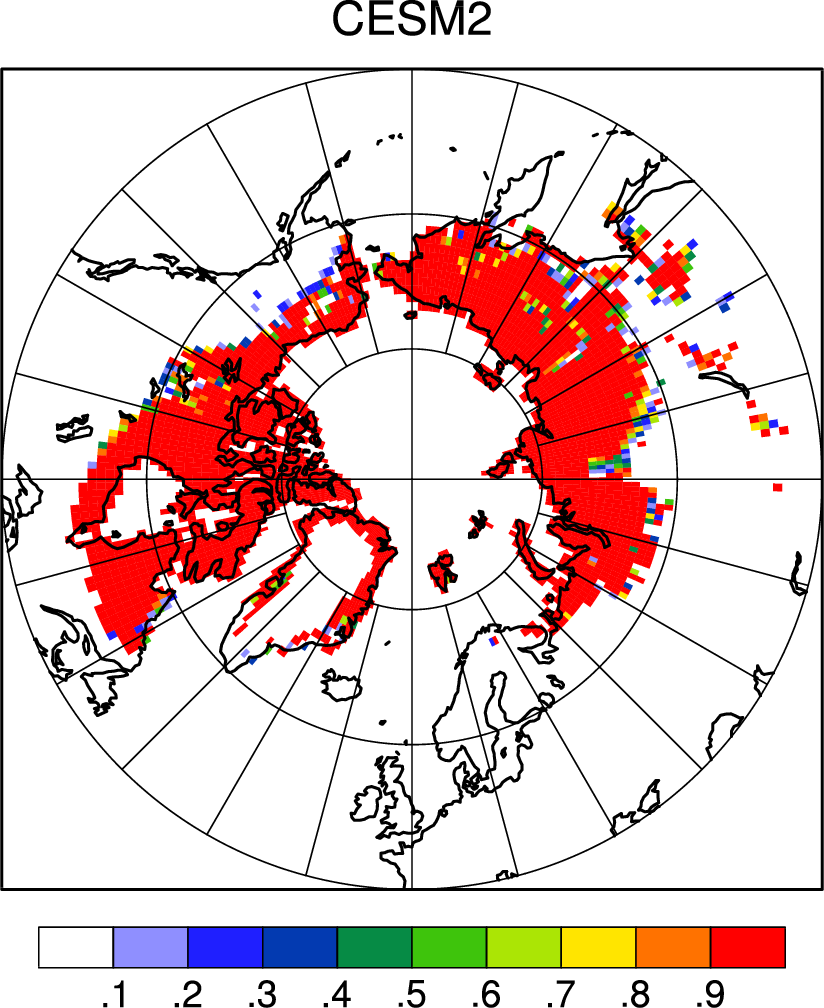

('CanESM5', (165, 64, 128))
(64, 128)
 


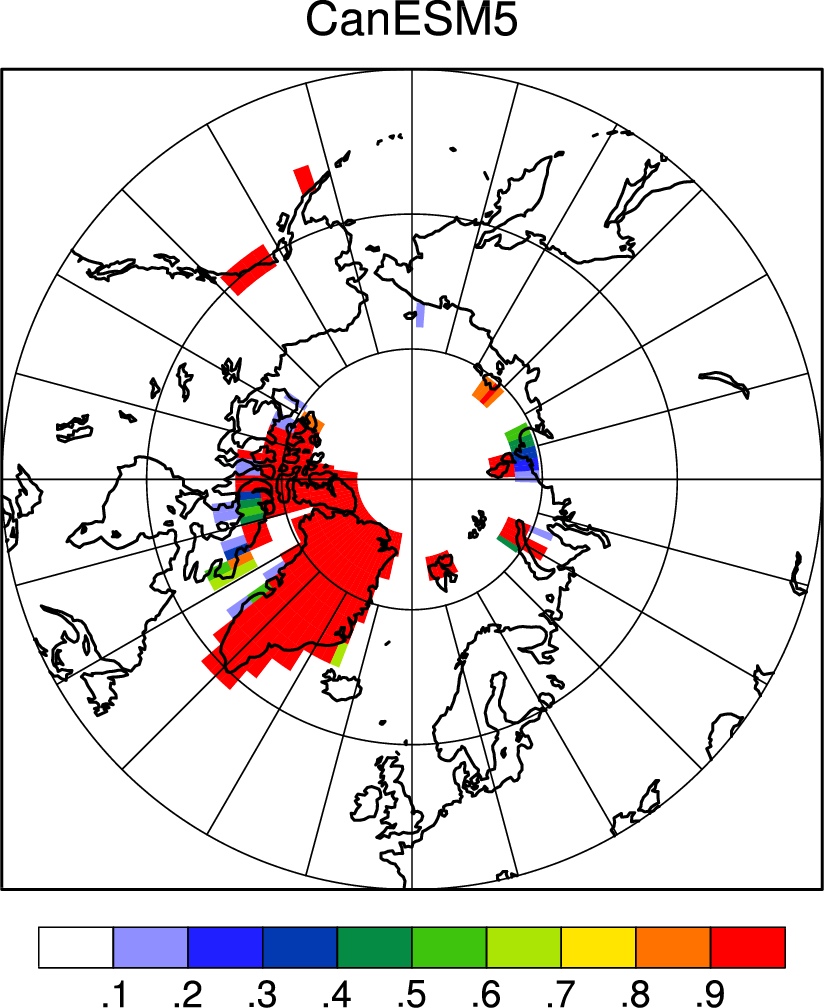

('E3SM-1-0', (165, 180, 360))
(180, 360)
 


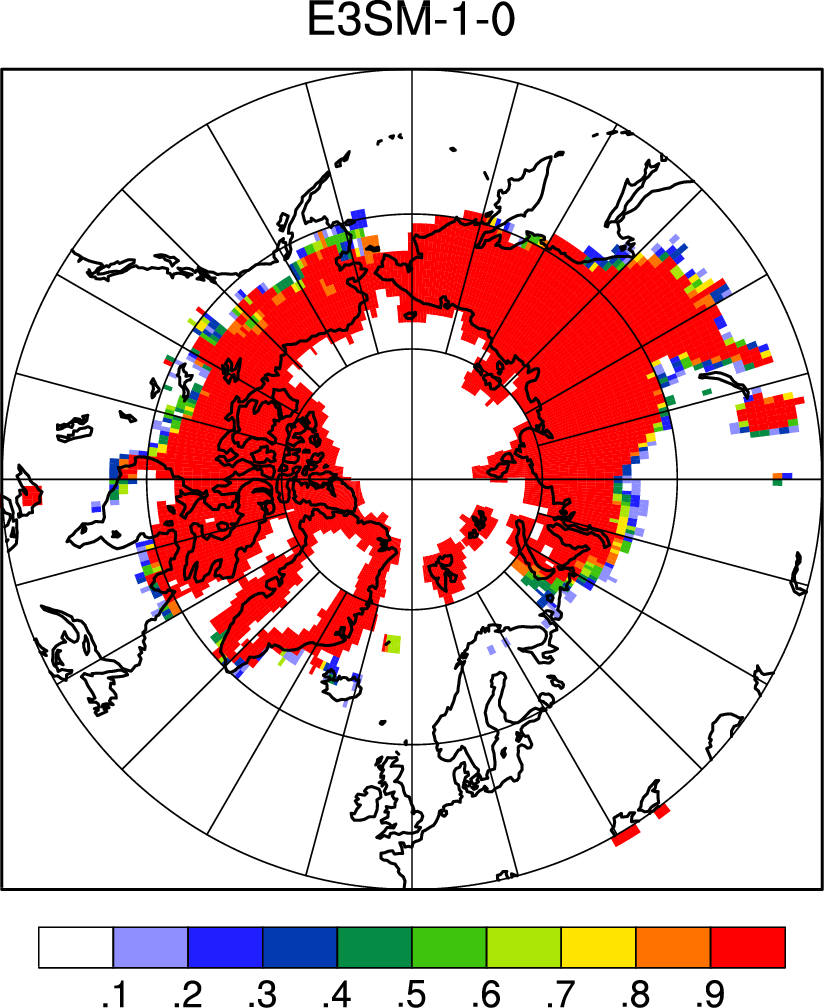

('EC-Earth3', (10, 256, 512))


/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


(256, 512)
 


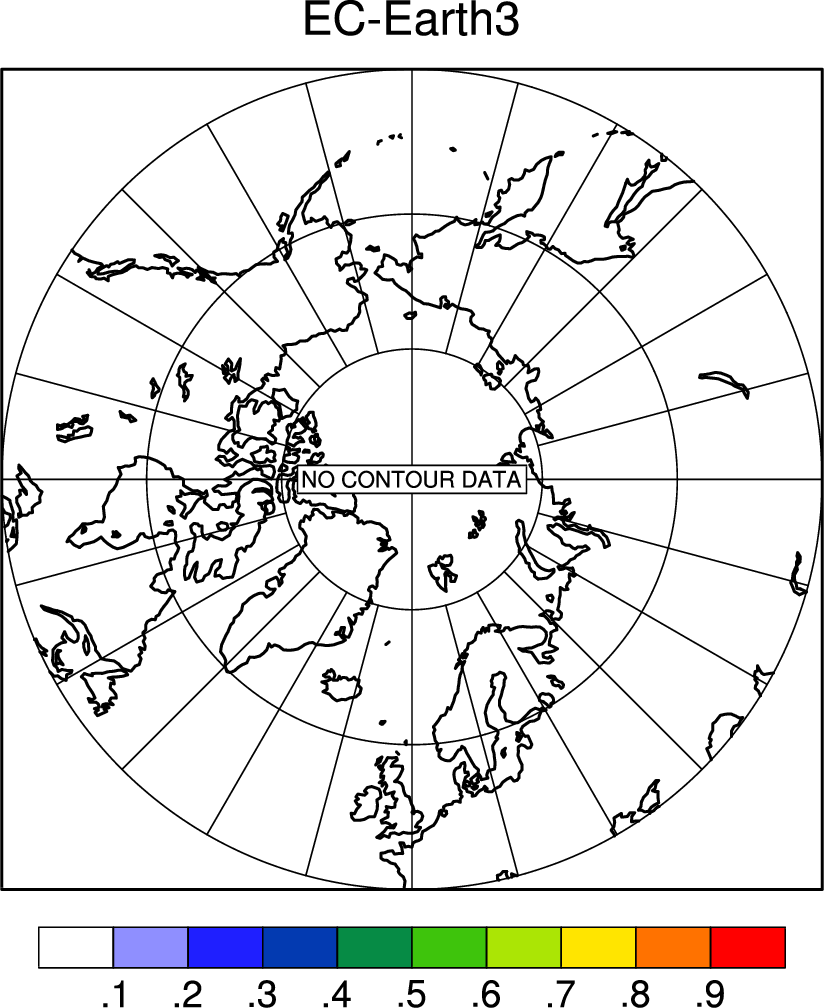

('GFDL-CM4', (165, 180, 288))
(180, 288)
 


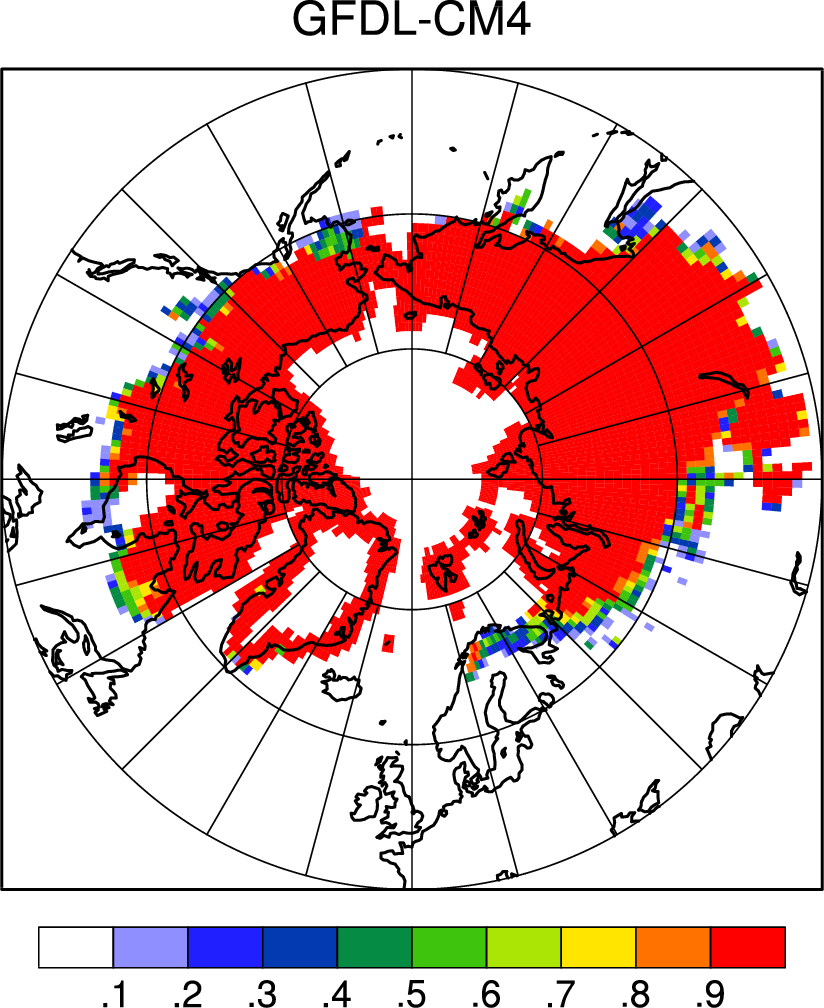

('GISS-E2-1-G-CC', (165, 90, 144))
(90, 144)
 


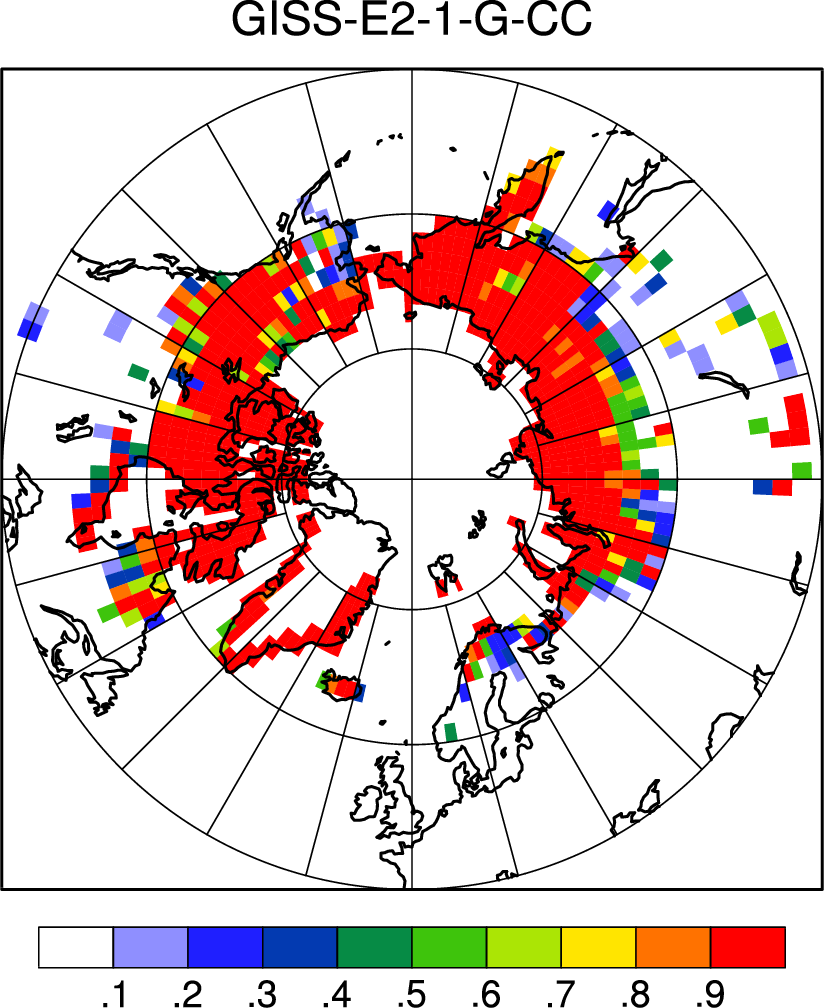

file io error
file io error
('IPSL-CM6A-LR', (165, 143, 144))
(143, 144)
 


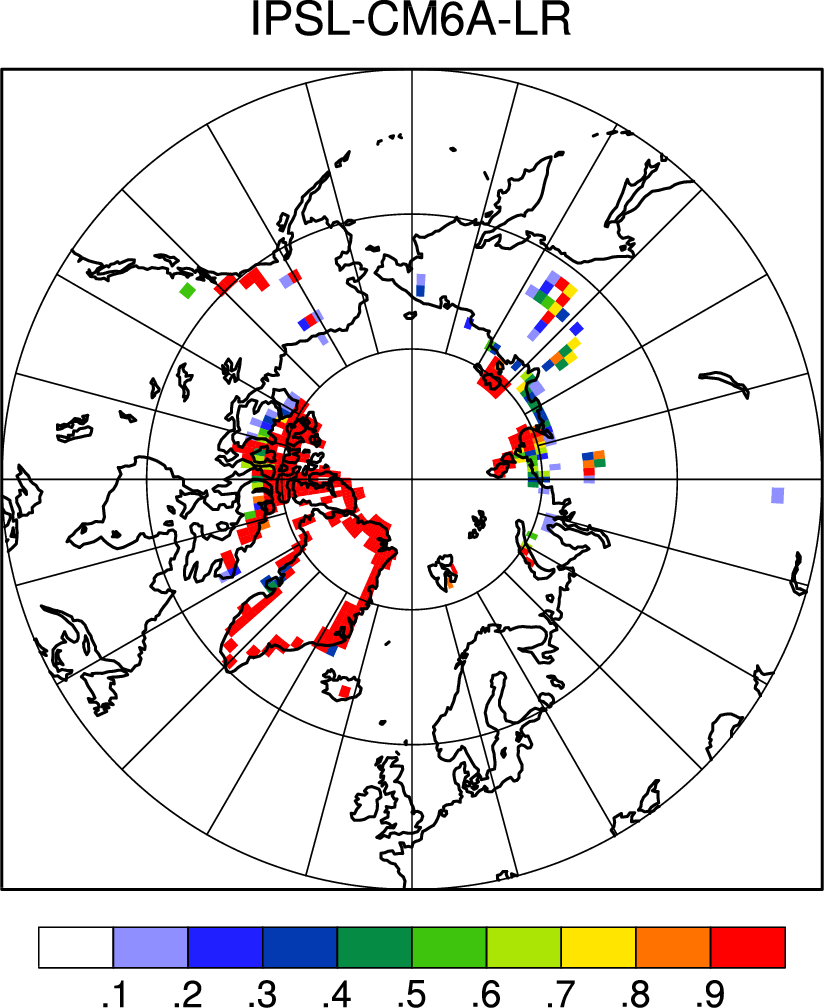

('MIROC6', (165, 128, 256))
(128, 256)
 


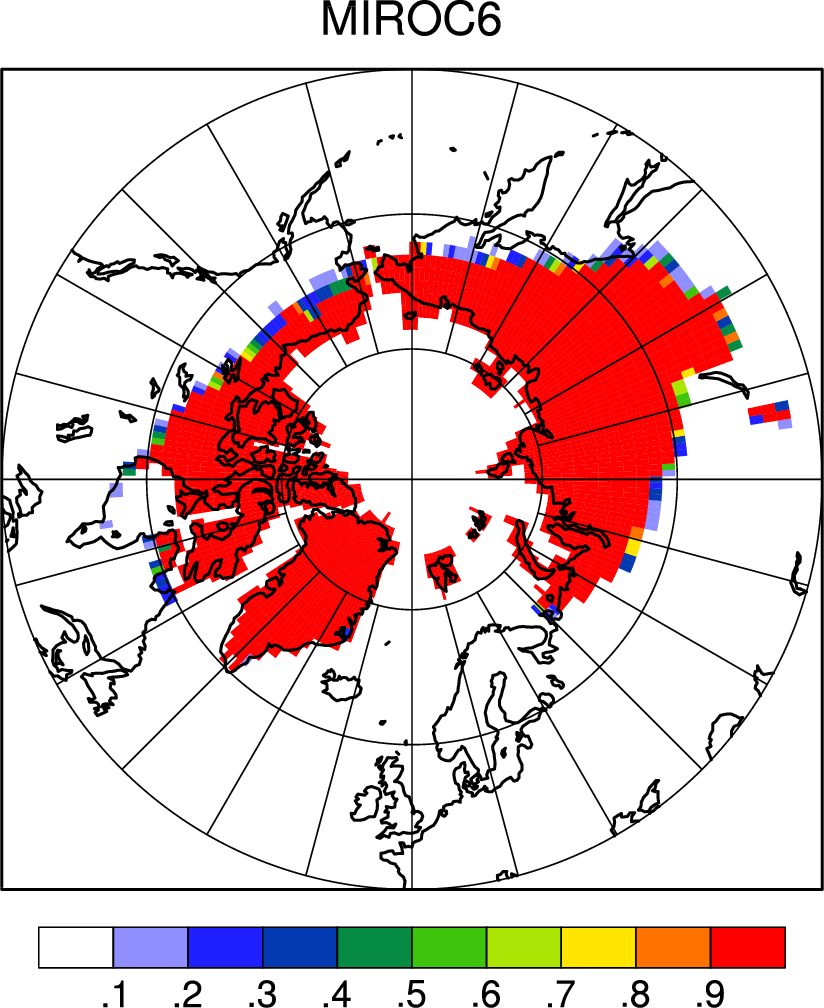

('MPI-ESM1-2-HR', (165, 192, 384))
(192, 384)
 


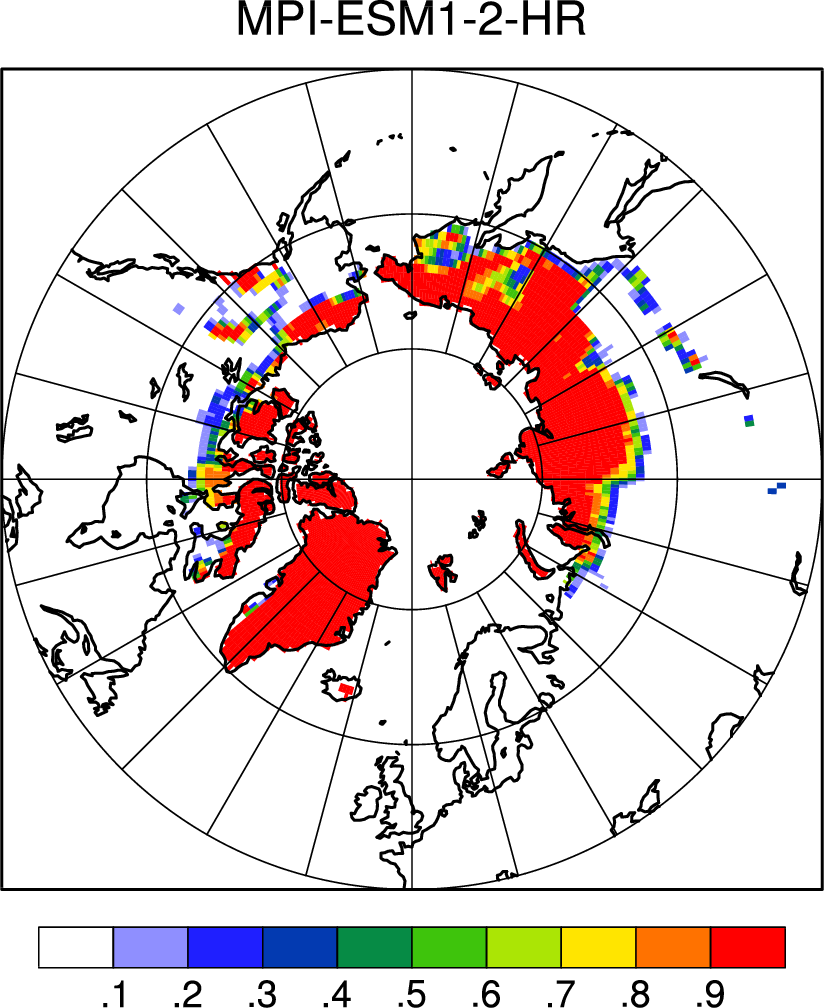

('MRI-ESM2-0', (165, 160, 320))
(160, 320)
 


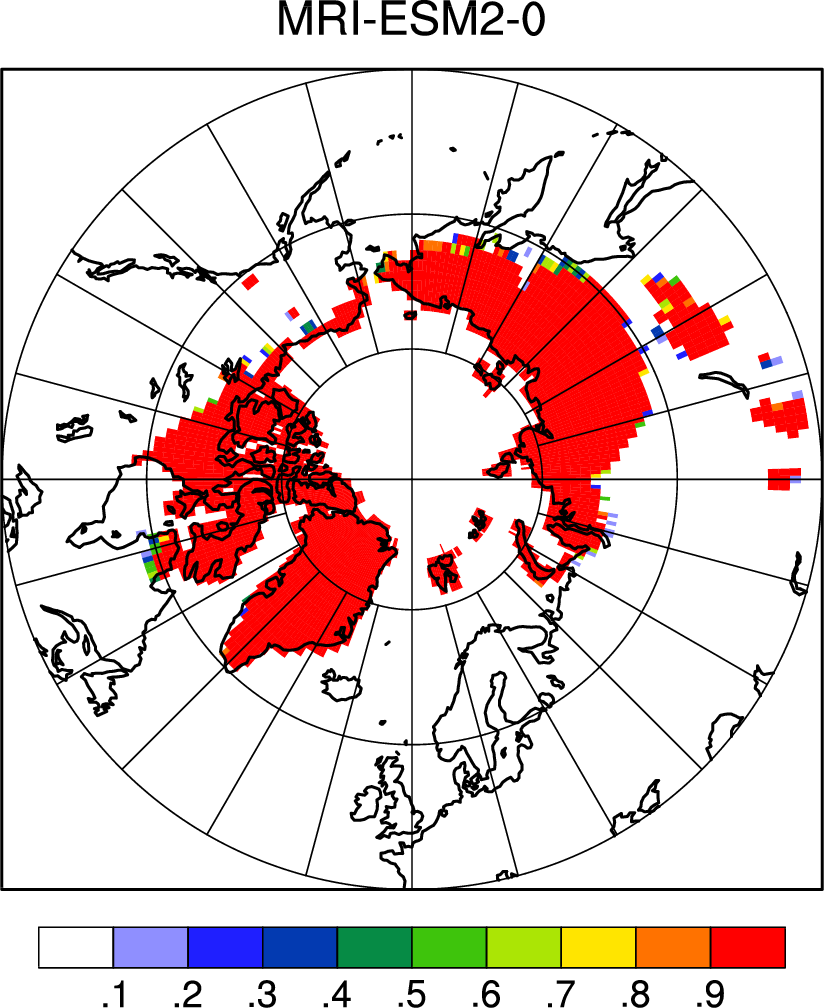

('NorESM2-LM', (155, 96, 144))
(96, 144)
 


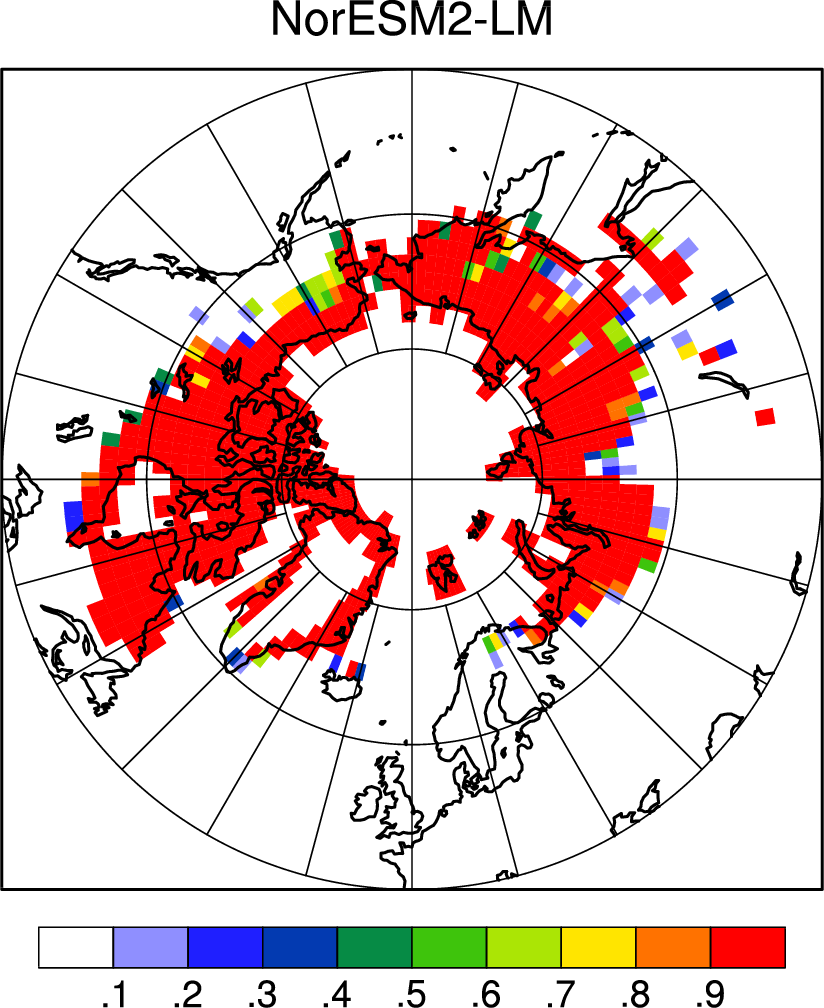

file io error


In [4]:
for i in range(nmodels):
    try:
        dataset = xr.open_mfdataset(datadir+s for s in tsl_filelist[i])
    except:
        print('file io error')
        continue
    tsl_annmax = smoothlib.annual_max_xarray(dataset['tsl'])
    #print(model_names[i], tsl_annmax.shape)
    #
    #print(model_names[i], tsl_annmax.dims)
    #try:
    #    print(model_names[i], tsl_annmax['depth'][:])
    #except:
    #    print(model_names[i], tsl_annmax['solth'])
    try:
        nlevs_lt_3m = (tsl_annmax['depth'] <= 3.).sum()
        tsl_annmax_top3m = tsl_annmax.sel(depth=slice(0.,3.))
        tsl_annmax_top3m_depthmin = tsl_annmax_top3m.min(dim='depth')
    except:
        nlevs_lt_3m = (tsl_annmax['solth'] <= 3.).sum()
        tsl_annmax_top3m = tsl_annmax.sel(solth=slice(0.,3.))
        tsl_annmax_top3m_depthmin = tsl_annmax_top3m.min(dim='solth')
    print(model_names[i], tsl_annmax_top3m_depthmin.shape)
    try:
        pf_historical = (tsl_annmax_top3m_depthmin[120:150,:,:] <= tfrz).mean(axis=0).compute()
        print(pf_historical.shape)
    except:
        print('indexing problem')
    map_funcs.fill(pf_historical.to_masked_array(), pf_historical['lat'].values, pf_historical['lon'].values, showjupyter=True, specialprojection='polar_stereo', title=model_names[i], grid=True, png_dens=200)
    